# Intro
- This is the first jupyter notebook for the EIA interhemispheric assymmetry (IHA) seen during different solar cycles
- TEC comparison during the March equinox is carried out for different years
    - Peaks of the north and south EIA are traced and compared

# Reading New TEC Data and Producing Output Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
from tqdm import tqdm
from apexpy import Apex
import os
import datetime as dt
import importlib as il

import sys
sys.path.append('../')
sys.path.append('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/prasoon_utility_programs')
import functions


from p_tqdm import p_map
from multiprocessing import Pool

In [ ]:
year = 2024

path = '/home/pxv220016/scratch/Qingyu_Cesar_EIA/' + str(year) + '_march_equinox/'
files = os.listdir(path)

tec_g = []
columns = ['GDLAT', 'GLON', 'TEC', 'DT']
grnd_tec = pd.DataFrame(columns=columns)

def process_file(f):
    df = pd.read_csv(path + f, sep=r'\s+')
    d = [dt.datetime(y, m, d, h, mi, s) for y, m, d, h, mi, s in zip(df.YEAR, df.MONTH, df.DAY, df.HOUR, df.MIN, df.SEC)]
    df['DT'] = d
    df = df.drop(['RECNO', 'KINDAT', 'KINST', 'UT1_UNIX', 'UT2_UNIX', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MIN', 'SEC', 'DTEC'], axis=1)
    if 'GDALT' in df.columns:
        df = df.drop(['GDALT'], axis=1)
    df = df[(df.GDLAT > -60) & (df.GDLAT < 60) & (df.GLON > -85) & (df.GLON < -45)].reset_index(drop=True)
    return df

tec_g = p_map(process_file, files)  # Parallel processing with progress bar

grnd_tec = pd.concat(tec_g, axis=0).reset_index(drop=True)
grnd_tec = grnd_tec.sort_values(by=['DT', 'GDLAT'], ascending=[True, True])

print(len(tec_g))
print(grnd_tec)

  0%|          | 0/43 [00:00<?, ?it/s]

In [ ]:
functions = il.reload(functions)

file = '/home/pxv220016/prasoon/data/sat_interp_repo/repo2/Qingyu_Cesar_EIA_IHA/kp3_index_values/kp_' + str(2024) '_march.txt'
kp = pd.read_csv(file,sep=r'\s+')

date_kp = [functions.day_to_date(i, year) for i in kp.DOY]
m, d = zip(*date_kp)
kp['date'] = [dt.datetime(year, j, i, k, 0, 0) for i,j,k in zip(d,m,kp.Hour)]
kp['kp'] = [i/10 for i in kp.Kp]
kp = kp.drop(['Year', 'DOY', 'Hour','Kp'], axis = 1)



In [ ]:
functions = il.reload(functions)

grnd_tec0 = functions.kp_index_filtering(grnd_tec, kp)


In [ ]:
tqdm.pandas()
functions = il.reload(functions)

gtime = grnd_tec.DT[0]
decimal_year = gtime.year + ((gtime - dt.datetime(gtime.year, 1, 1)).days) / 365.25
apex = Apex([decimal_year])

#grnd_tec1 = functions.magnetic_coords_parallel, zip(grnd_tec0, apex)

with Pool(20) as pool:

    p = pool.map(functions.magnetic_coords_parallel, zip(grnd_tec0.DT, grnd_tec0.GDLAT, grnd_tec0.GLON), apex)



f, s = zip(*original)

In [25]:
print(grnd_tec1[:10])

   GDLAT  GLON      TEC                  DT  F10.7   kp       MLAT       MLON  \
0   30.0 -80.0  27.7155 2024-02-29 00:02:30  161.1  0.3  39.347916  -3.945385   
1   17.0 -62.0  45.3185 2024-02-29 00:02:30  161.1  0.3  21.683157  16.005415   
2   17.0 -61.0  50.9435 2024-02-29 00:02:30  161.1  0.3  21.223639  17.057676   
3   17.0 -60.0  40.5504 2024-02-29 00:02:30  161.1  0.3  20.752712  18.096121   
4   17.0 -59.0  40.4734 2024-02-29 00:02:30  161.1  0.3  20.271669  19.121019   
5   17.0 -57.0  45.0067 2024-02-29 00:02:30  161.1  0.3  19.284569  21.131657   
6   17.0 -56.0  57.8738 2024-02-29 00:02:30  161.1  0.3  18.781242  22.118303   
7   17.0 -55.0  64.6158 2024-02-29 00:02:30  161.1  0.3  18.273243  23.093212   
8   17.0 -54.0  75.3889 2024-02-29 00:02:30  161.1  0.3  17.761965  24.056986   
9   17.0 -63.0  43.7523 2024-02-29 00:02:30  161.1  0.3  22.130016  14.939145   

         MLT  
0  18.632209  
1  19.962262  
2  20.032413  
3  20.101643  
4  20.169969  
5  20.304012  
6  

In [26]:
# you can give the MLON = (-0.5, 0.5)
grnd_tec1 = grnd_tec1[(grnd_tec1.MLON <= 5) & (grnd_tec1.MLON >= -5)].reset_index(drop=True)
grnd_tec1 = grnd_tec1[(grnd_tec1.MLAT <= 40) & (grnd_tec1.MLAT >= -40)].reset_index(drop=True)
grnd_tec2 = grnd_tec1.drop(['GDLAT', 'GLON','MLON'], axis = 1)

grnd_tec2.to_csv('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/Qingyu_Cesar_EIA_IHA/outputs/' + year(2024) + '_march_equinox.csv', index=False)

print(grnd_tec1)
print(grnd_tec2)


         GDLAT  GLON      TEC                  DT  F10.7   kp       MLAT  \
0         30.0 -80.0  27.7155 2024-02-29 00:02:30  161.1  0.3  39.347916   
1         18.0 -80.0  36.2819 2024-02-29 00:02:30  161.1  0.3  27.866224   
2         18.0 -79.0  37.1312 2024-02-29 00:02:30  161.1  0.3  27.752934   
3         18.0 -78.0  38.1255 2024-02-29 00:02:30  161.1  0.3  27.618063   
4         18.0 -77.0  34.2812 2024-02-29 00:02:30  161.1  0.3  27.461380   
...        ...   ...      ...                 ...    ...  ...        ...   
6624093  -22.0 -68.0  50.5923 2024-04-11 23:57:30  144.4  1.0 -11.799640   
6624094  -22.0 -67.0  50.0485 2024-04-11 23:57:30  144.4  1.0 -12.048483   
6624095  -22.0 -66.0  44.9897 2024-04-11 23:57:30  144.4  1.0 -12.317260   
6624096  -22.0 -75.0  47.5349 2024-04-11 23:57:30  144.4  1.0 -10.635079   
6624097  -23.0 -65.0  76.3553 2024-04-11 23:57:30  144.4  1.0 -13.501327   

             MLON        MLT  
0       -3.945385  18.632209  
1       -4.986003  18.562

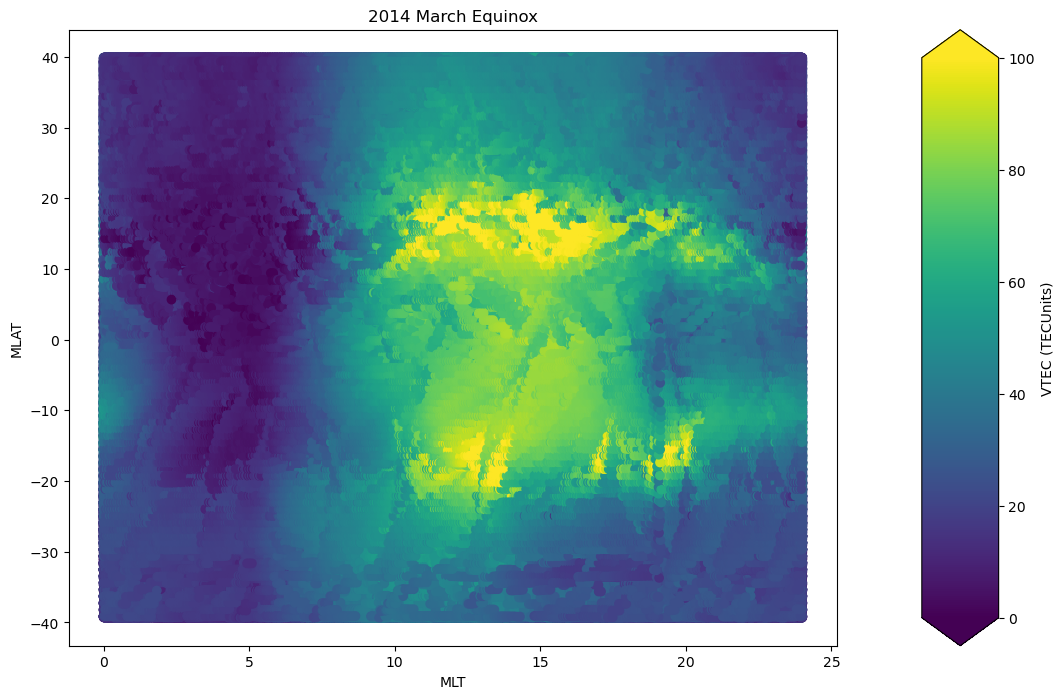

In [6]:
fig = plt.figure(figsize=(12,8))
specs = fig.add_gridspec(1, 2, width_ratios=[1,0.1])
ax = []
ax.append(fig.add_subplot(specs[0, 0]))
c = ax[0].scatter(grnd_tec2.MLT, grnd_tec2.MLAT, c=grnd_tec2.TEC, vmax=100, vmin=0)
ax[0].set_title('2014 March Equinox')
ax[0].set_ylabel('MLAT')
ax[0].set_xlabel('MLT')

cbar_ax = fig.add_subplot(specs[0,1])
cbar = fig.colorbar(c, cax=cbar_ax, label='VTEC (TECUnits)', extend='both')
fig.show()


# Reading Data Directly From Saved Output Files

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
from tqdm import tqdm
from apexpy import Apex
import datetime as dt

import sys
sys.path.append('../')
sys.path.append('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/prasoon_utility_programs')

In [42]:
year = 2024

# Reading the data from output csv
grnd_tec2 = pd.read_csv('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/Qingyu_Cesar_EIA_IHA/outputs/' + str(2024) + '_march_equinox.csv')
print(grnd_tec2)

             TEC                   DT  F10.7   kp       MLAT        MLT
0        27.7155  2024-02-29 00:02:30  161.1  0.3  39.347916  18.632209
1        36.2819  2024-02-29 00:02:30  161.1  0.3  27.866224  18.562834
2        37.1312  2024-02-29 00:02:30  161.1  0.3  27.752934  18.646515
3        38.1255  2024-02-29 00:02:30  161.1  0.3  27.618063  18.729920
4        34.2812  2024-02-29 00:02:30  161.1  0.3  27.461380  18.812976
...          ...                  ...    ...  ...        ...        ...
6624093  50.5923  2024-04-11 23:57:30  144.4  1.0 -11.799640  19.359029
6624094  50.0485  2024-04-11 23:57:30  144.4  1.0 -12.048483  19.411311
6624095  44.9897  2024-04-11 23:57:30  144.4  1.0 -12.317260  19.463397
6624096  47.5349  2024-04-11 23:57:30  144.4  1.0 -10.635079  18.985544
6624097  76.3553  2024-04-11 23:57:30  144.4  1.0 -13.501327  19.508293

[6624098 rows x 6 columns]


In [43]:
# Define the bin edges for B and C
bins_mlat = pd.cut(grnd_tec2['MLAT'], bins=pd.interval_range(start=-40, end=40, freq=1))
bins_mlt = pd.cut(grnd_tec2['MLT'], bins=pd.interval_range(start=0, end=24, freq=0.25))

# Create a new DataFrame with the bins
grnd_tec2['MLAT_b'] = bins_mlat
grnd_tec2['MLT_b'] = bins_mlt

# Group by the bins and calculate the average of A
result = grnd_tec2.groupby(['MLAT_b', 'MLT_b'])['TEC'].mean().reset_index()
print(result)

result['MLAT_b'] = result['MLAT_b'].apply(lambda x: x.mid)
result['MLT_b'] = result['MLT_b'].apply(lambda x: x.mid)
result['MLAT_b'] = result['MLAT_b'].astype(float)
result['MLT_b'] = result['MLT_b'].astype(float)

print(result)

          MLAT_b          MLT_b        TEC
0     (-40, -39]    (0.0, 0.25]  12.319553
1     (-40, -39]    (0.25, 0.5]  12.387023
2     (-40, -39]    (0.5, 0.75]  12.328296
3     (-40, -39]    (0.75, 1.0]  12.445452
4     (-40, -39]    (1.0, 1.25]  12.519799
...          ...            ...        ...
7675    (39, 40]  (22.75, 23.0]  17.539808
7676    (39, 40]  (23.0, 23.25]  17.015593
7677    (39, 40]  (23.25, 23.5]  16.930671
7678    (39, 40]  (23.5, 23.75]  16.757950
7679    (39, 40]  (23.75, 24.0]  16.501235

[7680 rows x 3 columns]
      MLAT_b   MLT_b        TEC
0      -39.5   0.125  12.319553
1      -39.5   0.375  12.387023
2      -39.5   0.625  12.328296
3      -39.5   0.875  12.445452
4      -39.5   1.125  12.519799
...      ...     ...        ...
7675    39.5  22.875  17.539808
7676    39.5  23.125  17.015593
7677    39.5  23.375  16.930671
7678    39.5  23.625  16.757950
7679    39.5  23.875  16.501235

[7680 rows x 3 columns]


In [44]:

result_t = result[result.MLT_b >= 12.5].reset_index(drop=True)
result_n = result_t[result_t.MLAT_b > 0].reset_index(drop=True)
result_s = result_t[result_t.MLAT_b < 0].reset_index(drop=True)

result_n = result_n.loc[result_n.groupby('MLT_b')['TEC'].idxmax()].reset_index(drop=True)
result_s = result_s.loc[result_s.groupby('MLT_b')['TEC'].idxmax()].reset_index(drop=True)

i = 100*2*(result_n.TEC - result_s.TEC)/(result_n.TEC + result_s.TEC)
result_ind = pd.DataFrame({'mlat_n': result_n.MLAT_b, 'mlat_s': result_s.MLAT_b, 'tec_n': result_n.TEC, 'tec_s': result_s.TEC, 'mlt': result_n.MLT_b, 'asy': i})
print(result_ind)

result_ind.to_csv('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/Qingyu_Cesar_EIA_IHA/outputs/asy_' + str(2024) + '_march.csv', index=False)


    mlat_n  mlat_s      tec_n      tec_s     mlt        asy
0      9.5   -12.5  76.667167  71.751028  12.625   6.624712
1      8.5   -12.5  78.583303  72.540404  12.875   7.997288
2     11.5   -14.5  80.116900  75.273428  13.125   6.233942
3     11.5   -14.5  81.741389  77.397842  13.375   5.458801
4     12.5   -14.5  83.074728  78.605165  13.625   5.528905
5     12.5   -14.5  85.052163  79.340088  13.875   6.949325
6     12.5   -14.5  85.187450  81.060497  14.125   4.964817
7     12.5   -14.5  84.894941  82.416929  14.375   2.962148
8     12.5   -13.5  86.056482  82.200433  14.625   4.583524
9     12.5   -14.5  85.391806  81.904222  14.875   4.169357
10    12.5   -13.5  84.846511  81.971598  15.125   3.446763
11    12.5   -11.5  84.301455  81.053314  15.375   3.928694
12    13.5   -13.5  82.834760  79.974948  15.625   3.513074
13    15.5   -12.5  80.799338  78.265352  15.875   3.186108
14    13.5   -13.5  79.955741  76.486744  16.125   4.434853
15    14.5   -13.5  78.885080  74.420133

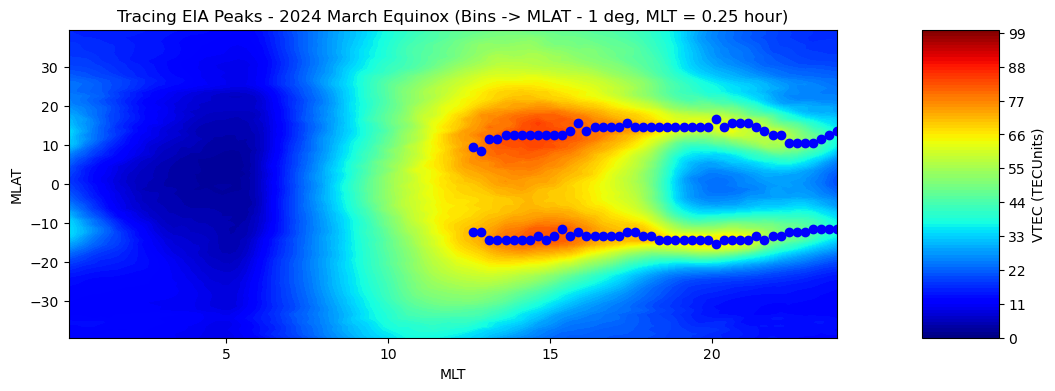

In [45]:
X, Y = np.meshgrid(result.MLT_b.unique(), result.MLAT_b.unique())
Z = result.TEC.values.reshape(X.shape)
contour_levels = list(range(101))

fig = plt.figure(figsize=(12,4))
specs = fig.add_gridspec(1, 2, width_ratios=[1,0.1])
ax = []
ax.append(fig.add_subplot(specs[0, 0]))
c = ax[0].contourf(X, Y, Z, levels=contour_levels, cmap = 'jet')
ax[0].scatter(result_ind.mlt, result_ind.mlat_n, c='b')
ax[0].scatter(result_ind.mlt, result_ind.mlat_s, c='b')
ax[0].set_title('Tracing EIA Peaks - ' + str(year) + ' March Equinox (Bins -> MLAT - 1 deg, MLT = 0.25 hour)')
ax[0].set_ylabel('MLAT')
ax[0].set_xlabel('MLT')

cbar_ax = fig.add_subplot(specs[0,1])
cbar = fig.colorbar(c, cax=cbar_ax, label='VTEC (TECUnits)', extend='both')
fig.show()

# Comparing Asymmetry Index

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
from tqdm import tqdm
from apexpy import Apex
import datetime as dt

import sys
sys.path.append('../')
sys.path.append('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/prasoon_utility_programs')

In [47]:
years = [2014, 2023, 2024]

asy_ind = []

for y in years:
    f = pd.read_csv('/home/pxv220016/prasoon/data/sat_interp_repo/repo2/Qingyu_Cesar_EIA_IHA/outputs/asy_' +str(y) + '_march.csv')
    asy_ind.append(f)

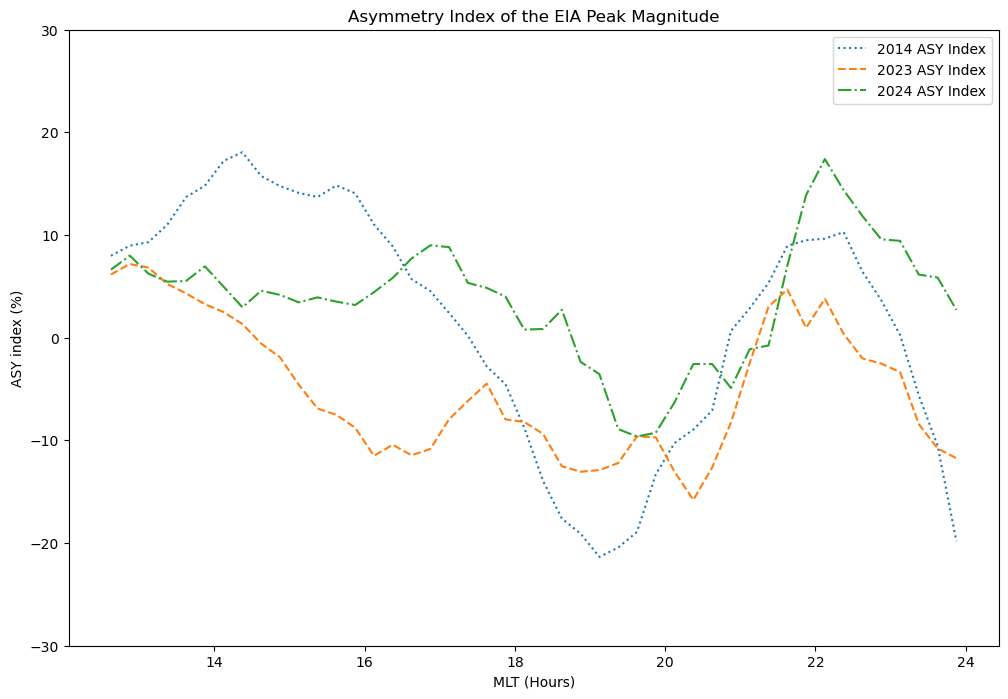

In [48]:

plt.figure(figsize=(12,8))
for a, i in zip(asy_ind, range(len(years))):
    plt.plot(a.mlt, a.asy, linestyle = '--', label= str(years[i]) + ' ASY Index')
plt.ylim(-30,30)
plt.legend()
plt.title('Asymmetry Index of the EIA Peak Magnitude')
plt.ylabel('ASY index (%)')
plt.xlabel('MLT (Hours)')
plt.show()